In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import xgboost as xgb
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.multioutput import MultiOutputRegressor
import os

%matplotlib notebook

In [2]:
filename_c = []
list_c = os.listdir('../data/c_prepared_data')
for f in list_c:
    if "all" in f:
        filename_c.append(f)

df_c = pd.DataFrame()
for f in filename_c:
    df1 = pd.read_csv("../data/c_prepared_data/"+f)
    df_c=df_c.append(df1)

display(df_c)

,mxamp,std,skew,kurtosis,aimean,lasimean,aistd,lasistd,hr,patmx,patpk,patft,sbp,dbp
0,1192.900858,323.576299,-0.184310,-1.149187,0.687681,0.060000,0.036085,0.000000,65.040650,0.273333,2.1700,0.206667,98.196667,65.373333
1,1192.900858,339.432634,-0.187815,-1.239822,0.738923,0.060000,0.015157,0.000000,62.176166,0.273333,2.2600,0.206667,104.613333,67.176667
2,1192.900858,324.194376,-0.306513,-1.101659,0.748644,0.057500,0.005436,0.002500,69.364162,0.282500,1.2100,0.217500,109.693333,72.980000
3,1203.866910,325.383586,-0.321261,-1.113743,0.663641,0.057500,0.079567,0.002500,69.364162,0.280000,1.1950,0.215000,115.752500,78.895000
4,1223.268210,348.023151,-0.213124,-1.267128,0.654774,0.057500,0.070701,0.002500,70.796460,0.271667,1.2000,0.210000,116.102500,82.622500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,280.924809,76.974487,0.060091,-1.210847,0.511777,0.093333,0.297473,0.040893,83.044983,NaN,1.1950,0.190000,100.937500,64.300000
83,303.249129,85.742040,0.236107,-1.190659,0.579171,0.075000,0.281850,0.030000,84.705882,NaN,1.7250,0.185000,102.285000,65.967500
84,385.590239,100.699059,0.080688,-1.141817,0.434912,0.101667,0.297369,0.036818,81.911263,1.705000,1.1425,0.173333,105.820000,69.965000
85,392.598289,110.293092,0.112247,-1.266855,0.429627,0.110000,0.270078,0.035000,75.709779,1.032500,2.0000,0.175000,109.287500,71.192500


In [3]:
filename_j = []
list_j = os.listdir('../data/j_prepared_data')
for f in list_j:
    if "all" in f:
        filename_j.append(f)



df_j = pd.DataFrame()
for f in filename_j:
    df2 = pd.read_csv("../data/j_prepared_data/"+f)
    df_j=df_j.append(df2)

display(df_j)

,mxamp,std,skew,kurtosis,aimean,lasimean,aistd,lasistd,hr,patmx,patpk,patft,sbp,dbp
0,2879.176501,751.728982,-0.229849,-0.933357,0.021117,0.155000,0.138829,0.004082,88.669951,-0.33875,0.2675,0.152500,94.670000,81.235
1,2765.073311,719.716591,-0.357917,-0.762510,0.105587,0.160000,0.030531,0.004082,83.916084,-0.18000,1.1150,0.156667,93.082000,79.270
2,2833.671027,778.133839,-0.388241,-0.945357,-0.040858,0.158333,0.092396,0.004714,90.909091,-0.30875,1.5975,0.166250,91.200000,77.075
3,2783.069263,743.363892,-0.791137,-0.341928,-0.116708,0.156667,0.038513,0.002357,95.490716,-0.26875,2.1600,0.168750,90.622000,76.212
4,2804.659607,790.950755,-0.638073,-0.764912,-0.123920,0.165000,0.021637,0.004082,97.826087,-0.24875,1.4950,0.165000,90.712500,76.080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,1648.349920,454.933806,-0.313119,-0.754156,-0.002683,0.145000,0.015902,0.000000,98.901099,0.21875,1.5075,0.160000,115.404000,79.242
83,1659.651143,448.757452,-0.422786,-0.687299,-0.050595,0.145000,0.047562,0.000000,98.630137,-0.01250,1.5100,0.167500,113.977500,78.740
84,1610.583462,436.938508,-0.561483,-0.606359,-0.111088,0.146667,0.030226,0.002357,100.558659,-0.24000,2.0850,0.172500,110.652000,76.768
85,1718.082386,451.968913,-0.571665,-0.592175,-0.161014,0.146667,0.015564,0.002357,104.347826,-0.20875,1.4500,0.171250,109.262000,75.214


In [35]:
# Merge dataframes as one, suffle data rows with frac=1
df = df_c.append(df_j)
df = df.sample(frac=1).reset_index()

In [36]:
features = df[['mxamp', 'std', 'skew','kurtosis','aimean','lasimean','aistd','lasistd','hr',  'patpk', 'patft']]

target = df[['sbp', 'dbp']]

In [37]:
features

,mxamp,std,skew,kurtosis,aimean,lasimean,aistd,lasistd,hr,patpk,patft
0,1682.572872,467.166583,-0.019840,-1.271097,0.703728,0.053333,0.019490,0.002357,80.267559,1.0725,0.211667
1,1519.956117,460.074382,0.074893,-1.394057,0.918421,0.040000,0.000000,0.000000,61.538462,1.3550,0.208333
2,928.637275,212.979158,-0.548836,-0.524850,0.643219,0.058333,0.035973,0.002357,89.887640,1.6650,0.200000
3,845.193041,224.341165,-0.225759,-1.058288,0.755407,0.052500,0.003292,0.007500,85.409253,1.7200,0.181667
4,2765.073311,719.716591,-0.357917,-0.762510,0.105587,0.160000,0.030531,0.004082,83.916084,1.1150,0.156667
...,...,...,...,...,...,...,...,...,...,...,...
830,2057.724295,535.617277,0.050200,-1.013718,0.436964,0.170000,0.024625,0.000000,66.115702,2.1000,0.146667
831,3078.995246,832.556952,-0.174950,-0.928535,0.005074,0.160000,0.069831,0.004082,91.370558,1.5875,0.160000
832,1359.778941,359.462445,-0.725431,-0.515185,-0.032714,0.143333,0.027040,0.002357,98.360656,2.1150,0.175000
833,638.860052,179.937254,-0.444709,-0.957077,0.665996,0.055000,0.038604,0.000000,81.081081,1.7800,0.188333


In [38]:
target

,sbp,dbp
0,112.0150,84.380000
1,104.8700,79.407500
2,98.5425,70.910000
3,84.1525,68.257500
4,93.0820,79.270000
...,...,...
830,130.1750,87.496667
831,109.4550,74.392500
832,112.2025,76.330000
833,85.7600,69.722500


In [39]:
def cindex(true_labels, predictions):
    n,h = 0,0
    
    for i in range(1,len(true_labels)):
        t = true_labels[i]
        p = predictions[i]
        for j in range(i+1,len(true_labels)):
            nt = true_labels[j]
            npr = predictions[j]
            if t != nt:
                n += 1
                if (p < npr and t < nt) or (p > npr and t > nt):
                    h += 1
                else :
                    h += 0.5
                    
    return h/n

In [40]:
# model and its current hyperparameters

model = xgb.XGBRegressor(max_depth=5,learning_rate=0.2, eta=0.2, gamma=0.3)
wrapper = MultiOutputRegressor(model)

loo = LeaveOneOut()
X = features.values
y = target.values


In [41]:
sbp_er = []
dbp_er = []
true_label = []
pred_label = []
acc_sbp = 0
acc_dbp = 0

for i, (train_idx, val_idx) in enumerate(loo.split(X)):
    X_train, X_test = X[train_idx], X[val_idx]
    y_train, y_test = y[train_idx], y[val_idx]
    
    # xgb through wrapper 
    xgbr = make_pipeline(StandardScaler(),wrapper)
    xgbr.fit(X, y)
    y_pred = xgbr.predict(X_test)
    
    mae_sbp = mean_absolute_error(y_pred[:,0], y_test[:,0])
    mae_dbp = mean_absolute_error(y_pred[:,1], y_test[:,1])

    if mae_sbp<= 10:
        acc_sbp = acc_sbp+1
    if mae_dbp <=10:
        acc_dbp = acc_dbp+1
        
    sbp_er.append(mae_sbp)
    dbp_er.append(mae_dbp)
    
    true_label.append(y_test)
    pred_label.append(y_pred)
true = [item for sublist in true_label for item in sublist]
pred = [item for sublist in pred_label for item in sublist]

true = np.array(true)
pred = np.array(pred)

cidx_sbp = cindex(true[:,0], pred[:,0])
cidx_dbp = cindex(true[:,1], pred[:,1])
    
print(f"Average MAE SBP: {np.mean(sbp_er)} MAE DBP: {np.mean(dbp_er)}")
print(f"C index SBP: {cidx_sbp}  C index DBP: {cidx_dbp}")
print(f"Probability SBP: {acc_sbp/len(pred)}  Probability DBP: {acc_dbp/len(pred)}" )

Average MAE SBP: 0.9648909463299962 MAE DBP: 0.6481327107381916
C index SBP: 0.9842524218738754  C index DBP: 0.9846467868514541
Probability SBP: 1.0  Probability DBP: 1.0


In [42]:
df_xgb = pd.DataFrame({
    "true_sbp": true[:,0], 
    "pred_sbp": pred[:,0],
    "true_dbp": true[:,1],
    "pred_dbp": pred[:,1]
                       })
display(df_xgb)

print(f"Average MAE SBP: {np.mean(sbp_er)} MAE DBP: {np.mean(dbp_er)}")
print(f"C index SBP: {cidx_sbp}  C index DBP: {cidx_dbp}")
print(f"Probability SBP: {acc_sbp/len(pred)}  Probability DBP: {acc_dbp/len(pred)}" )

,true_sbp,pred_sbp,true_dbp,pred_dbp
0,112.0150,110.846222,84.380000,83.787407
1,104.8700,105.725281,79.407500,78.859116
2,98.5425,98.047165,70.910000,70.690895
3,84.1525,84.443810,68.257500,69.612274
4,93.0820,97.743660,79.270000,79.542297
...,...,...,...,...
830,130.1750,128.982834,87.496667,86.256073
831,109.4550,106.370033,74.392500,74.184669
832,112.2025,112.025192,76.330000,75.742035
833,85.7600,86.721313,69.722500,69.958305


Average MAE SBP: 0.9648909463299962 MAE DBP: 0.6481327107381916
C index SBP: 0.9842524218738754  C index DBP: 0.9846467868514541
Probability SBP: 1.0  Probability DBP: 1.0


<IPython.core.display.Javascript object>


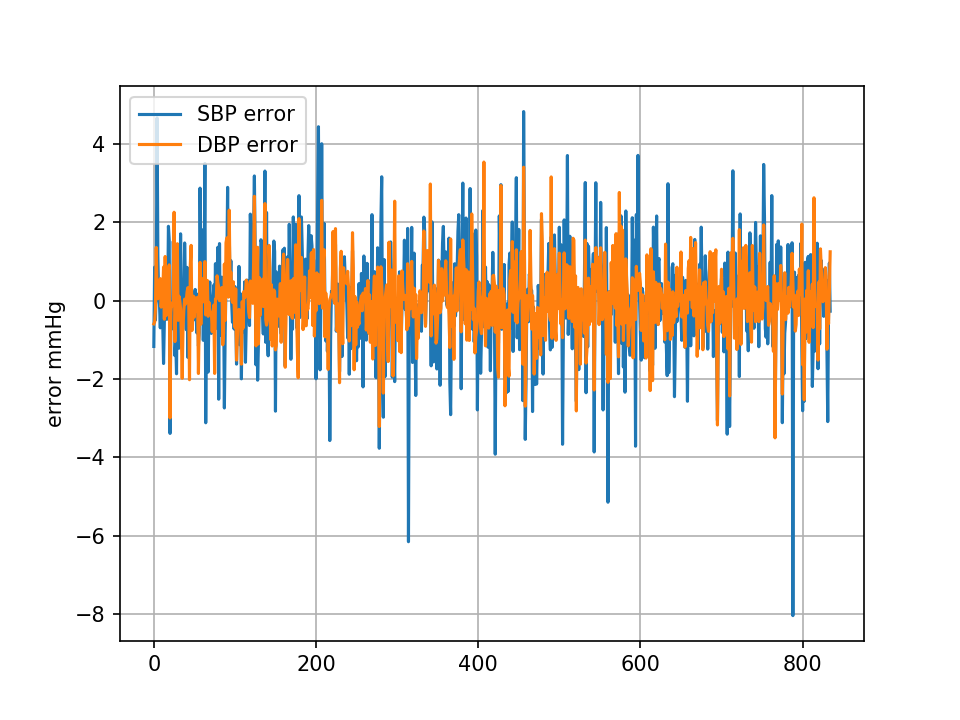

In [43]:
error_df=pd.DataFrame()
error_df["sbp error"]=df_xgb['pred_sbp']-df_xgb['true_sbp']
error_df["dbp error"]=df_xgb['pred_dbp']-df_xgb['true_dbp']

y=error_df["sbp error"]
x=len(error_df)

plt.figure()
plt.plot(error_df["sbp error"], label="SBP error")
plt.plot(error_df["dbp error"], label="DBP error")
plt.legend(loc="upper left")
plt.ylabel('error mmHg')
plt.grid()
plt.show()

# Testing with different datas:
# C as train:


In [44]:
display(df_c)

,mxamp,std,skew,kurtosis,aimean,lasimean,aistd,lasistd,hr,patmx,patpk,patft,sbp,dbp
0,1192.900858,323.576299,-0.184310,-1.149187,0.687681,0.060000,0.036085,0.000000,65.040650,0.273333,2.1700,0.206667,98.196667,65.373333
1,1192.900858,339.432634,-0.187815,-1.239822,0.738923,0.060000,0.015157,0.000000,62.176166,0.273333,2.2600,0.206667,104.613333,67.176667
2,1192.900858,324.194376,-0.306513,-1.101659,0.748644,0.057500,0.005436,0.002500,69.364162,0.282500,1.2100,0.217500,109.693333,72.980000
3,1203.866910,325.383586,-0.321261,-1.113743,0.663641,0.057500,0.079567,0.002500,69.364162,0.280000,1.1950,0.215000,115.752500,78.895000
4,1223.268210,348.023151,-0.213124,-1.267128,0.654774,0.057500,0.070701,0.002500,70.796460,0.271667,1.2000,0.210000,116.102500,82.622500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,280.924809,76.974487,0.060091,-1.210847,0.511777,0.093333,0.297473,0.040893,83.044983,NaN,1.1950,0.190000,100.937500,64.300000
83,303.249129,85.742040,0.236107,-1.190659,0.579171,0.075000,0.281850,0.030000,84.705882,NaN,1.7250,0.185000,102.285000,65.967500
84,385.590239,100.699059,0.080688,-1.141817,0.434912,0.101667,0.297369,0.036818,81.911263,1.705000,1.1425,0.173333,105.820000,69.965000
85,392.598289,110.293092,0.112247,-1.266855,0.429627,0.110000,0.270078,0.035000,75.709779,1.032500,2.0000,0.175000,109.287500,71.192500


In [45]:
features_c = df_c[['mxamp', 'std', 'skew','kurtosis','aimean','lasimean','aistd','lasistd','hr',  'patpk', 'patft']]
target_c = df_c[['sbp', 'dbp']]

# J as test:

In [46]:
display(df_j)

,mxamp,std,skew,kurtosis,aimean,lasimean,aistd,lasistd,hr,patmx,patpk,patft,sbp,dbp
0,2879.176501,751.728982,-0.229849,-0.933357,0.021117,0.155000,0.138829,0.004082,88.669951,-0.33875,0.2675,0.152500,94.670000,81.235
1,2765.073311,719.716591,-0.357917,-0.762510,0.105587,0.160000,0.030531,0.004082,83.916084,-0.18000,1.1150,0.156667,93.082000,79.270
2,2833.671027,778.133839,-0.388241,-0.945357,-0.040858,0.158333,0.092396,0.004714,90.909091,-0.30875,1.5975,0.166250,91.200000,77.075
3,2783.069263,743.363892,-0.791137,-0.341928,-0.116708,0.156667,0.038513,0.002357,95.490716,-0.26875,2.1600,0.168750,90.622000,76.212
4,2804.659607,790.950755,-0.638073,-0.764912,-0.123920,0.165000,0.021637,0.004082,97.826087,-0.24875,1.4950,0.165000,90.712500,76.080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,1648.349920,454.933806,-0.313119,-0.754156,-0.002683,0.145000,0.015902,0.000000,98.901099,0.21875,1.5075,0.160000,115.404000,79.242
83,1659.651143,448.757452,-0.422786,-0.687299,-0.050595,0.145000,0.047562,0.000000,98.630137,-0.01250,1.5100,0.167500,113.977500,78.740
84,1610.583462,436.938508,-0.561483,-0.606359,-0.111088,0.146667,0.030226,0.002357,100.558659,-0.24000,2.0850,0.172500,110.652000,76.768
85,1718.082386,451.968913,-0.571665,-0.592175,-0.161014,0.146667,0.015564,0.002357,104.347826,-0.20875,1.4500,0.171250,109.262000,75.214


In [47]:
Xj_test = df_j[['mxamp', 'std', 'skew','kurtosis','aimean','lasimean','aistd','lasistd','hr',  'patpk', 'patft']]
yj_values=df_j[['sbp', 'dbp']]


# Model

In [48]:
model_c = xgb.XGBRegressor(max_depth=6,learning_rate=0.1, eta=0.4, gamma=0.2)
wrapper = MultiOutputRegressor(model_c)

Xc = features_c.values
yc = target_c.values


xgbr = make_pipeline(StandardScaler(),wrapper)
xgbr.fit(Xc, yc)

yj_pred = xgbr.predict(Xj_test)

true = np.array(yj_values)
pred = np.array(yj_pred)

df_cj = pd.DataFrame({
    "true_sbp": true[:,0], 
    "pred_sbp": pred[:,0],
    "true_dbp": true[:,1],
    "pred_dbp": pred[:,1]
                       })
display(df_cj)

,true_sbp,pred_sbp,true_dbp,pred_dbp
0,94.670000,97.396690,81.235,75.785973
1,93.082000,98.341789,79.270,75.422600
2,91.200000,107.491615,77.075,78.173622
3,90.622000,106.151939,76.212,75.079453
4,90.712500,105.721794,76.080,75.785446
...,...,...,...,...
430,115.404000,105.181709,79.242,75.127914
431,113.977500,106.124138,78.740,75.880402
432,110.652000,98.333153,76.768,75.461472
433,109.262000,97.712296,75.214,76.193436


In [49]:
error_df_cj=pd.DataFrame()
error_df_cj["sbp error"]=df_cj['pred_sbp']-df_cj['true_sbp']
error_df_cj["dbp error"]=df_cj['pred_dbp']-df_cj['true_dbp']
display(error_df_cj)

,sbp error,dbp error
0,2.726690,-5.449027
1,5.259789,-3.847400
2,16.291615,1.098622
3,15.529939,-1.132547
4,15.009294,-0.294554
...,...,...
430,-10.222291,-4.114086
431,-7.853362,-2.859598
432,-12.318847,-1.306528
433,-11.549704,0.979436


In [50]:
result_df_cj=pd.concat([df_cj,error_df_cj],axis=1)

result_df_cj[['true_sbp','pred_sbp','sbp error']]

,true_sbp,pred_sbp,sbp error
0,94.670000,97.396690,2.726690
1,93.082000,98.341789,5.259789
2,91.200000,107.491615,16.291615
3,90.622000,106.151939,15.529939
4,90.712500,105.721794,15.009294
...,...,...,...
430,115.404000,105.181709,-10.222291
431,113.977500,106.124138,-7.853362
432,110.652000,98.333153,-12.318847
433,109.262000,97.712296,-11.549704


In [51]:
result_df_cj[['true_dbp','pred_dbp','dbp error']]

,true_dbp,pred_dbp,dbp error
0,81.235,75.785973,-5.449027
1,79.270,75.422600,-3.847400
2,77.075,78.173622,1.098622
3,76.212,75.079453,-1.132547
4,76.080,75.785446,-0.294554
...,...,...,...
430,79.242,75.127914,-4.114086
431,78.740,75.880402,-2.859598
432,76.768,75.461472,-1.306528
433,75.214,76.193436,0.979436


In [52]:
print("Systolic Blood pressure avg error: ",result_df_cj['sbp error'].mean())
print("Diastolic Blood pressure avg error: ",result_df_cj['dbp error'].mean())

Systolic Blood pressure avg error:  -3.949878521564819
Diastolic Blood pressure avg error:  4.611029418337297


<IPython.core.display.Javascript object>


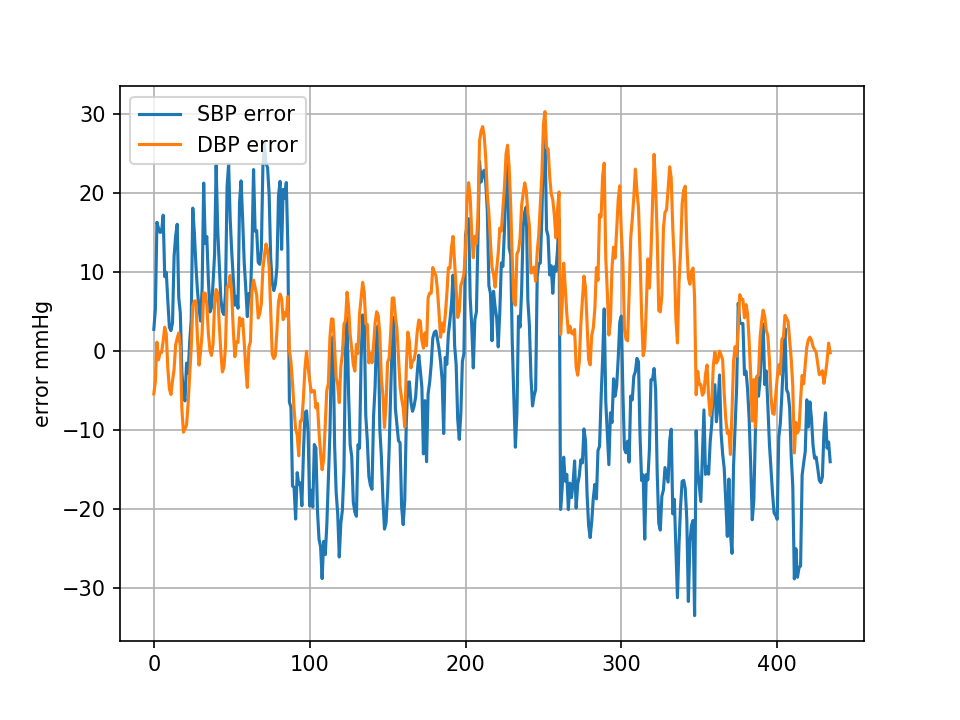

In [53]:
plt.figure()
plt.plot(result_df_cj['sbp error'], label="SBP error")
plt.plot(result_df_cj['dbp error'], label="DBP error")
plt.legend(loc="upper left")
plt.ylabel('error mmHg')
plt.grid()
plt.show()

# Another way around
# J as train, C as test

In [54]:
features_j = df_j[['mxamp', 'std', 'skew','kurtosis','aimean','lasimean','aistd','lasistd','hr',  'patpk', 'patft']]
target_j = df_j[['sbp', 'dbp']]

Xc_test = df_c[['mxamp', 'std', 'skew','kurtosis','aimean','lasimean','aistd','lasistd','hr',  'patpk', 'patft']]
yc_values=df_c[['sbp', 'dbp']]

In [55]:
model_j = xgb.XGBRegressor(max_depth=6,learning_rate=0.1, eta=0.4, gamma=0.2)
wrapper = MultiOutputRegressor(model_j)

Xj = features_j.values
yj = target_j.values


xgbr = make_pipeline(StandardScaler(),wrapper)
xgbr.fit(Xj, yj)

yc_pred = xgbr.predict(Xc_test)

true = np.array(yc_values)
pred = np.array(yc_pred)

df_jc = pd.DataFrame({
    "true_sbp": true[:,0], 
    "pred_sbp": pred[:,0],
    "true_dbp": true[:,1],
    "pred_dbp": pred[:,1]
                       })
display(df_jc)

,true_sbp,pred_sbp,true_dbp,pred_dbp
0,98.196667,105.879837,65.373333,65.760826
1,104.613333,105.251877,67.176667,65.120239
2,109.693333,100.747101,72.980000,63.734432
3,115.752500,103.175293,78.895000,60.851734
4,116.102500,105.092552,82.622500,63.785892
...,...,...,...,...
395,100.937500,104.612427,64.300000,64.731628
396,102.285000,109.790634,65.967500,66.171036
397,105.820000,109.984222,69.965000,73.102547
398,109.287500,108.863388,71.192500,74.344406


In [56]:
error_df_jc=pd.DataFrame()
error_df_jc["sbp error"]=df_jc['pred_sbp']-df_jc['true_sbp']
error_df_jc["dbp error"]=df_jc['pred_dbp']-df_jc['true_dbp']

result_df_jc=pd.concat([df_jc,error_df_jc],axis=1)

result_df_jc[['true_sbp','pred_sbp','sbp error']]


,true_sbp,pred_sbp,sbp error
0,98.196667,105.879837,7.683170
1,104.613333,105.251877,0.638543
2,109.693333,100.747101,-8.946233
3,115.752500,103.175293,-12.577207
4,116.102500,105.092552,-11.009948
...,...,...,...
395,100.937500,104.612427,3.674927
396,102.285000,109.790634,7.505634
397,105.820000,109.984222,4.164222
398,109.287500,108.863388,-0.424112


In [57]:
result_df_jc[['true_dbp','pred_dbp','dbp error']]

,true_dbp,pred_dbp,dbp error
0,65.373333,65.760826,0.387493
1,67.176667,65.120239,-2.056427
2,72.980000,63.734432,-9.245568
3,78.895000,60.851734,-18.043266
4,82.622500,63.785892,-18.836608
...,...,...,...
395,64.300000,64.731628,0.431628
396,65.967500,66.171036,0.203536
397,69.965000,73.102547,3.137547
398,71.192500,74.344406,3.151906


In [58]:
print("Systolic Blood pressure avg error: ",result_df_jc['sbp error'].mean())
print("Diastolic Blood pressure avg error: ",result_df_jc['dbp error'].mean())

Systolic Blood pressure avg error:  -3.109941511128742
Diastolic Blood pressure avg error:  -14.401093267008461


<IPython.core.display.Javascript object>


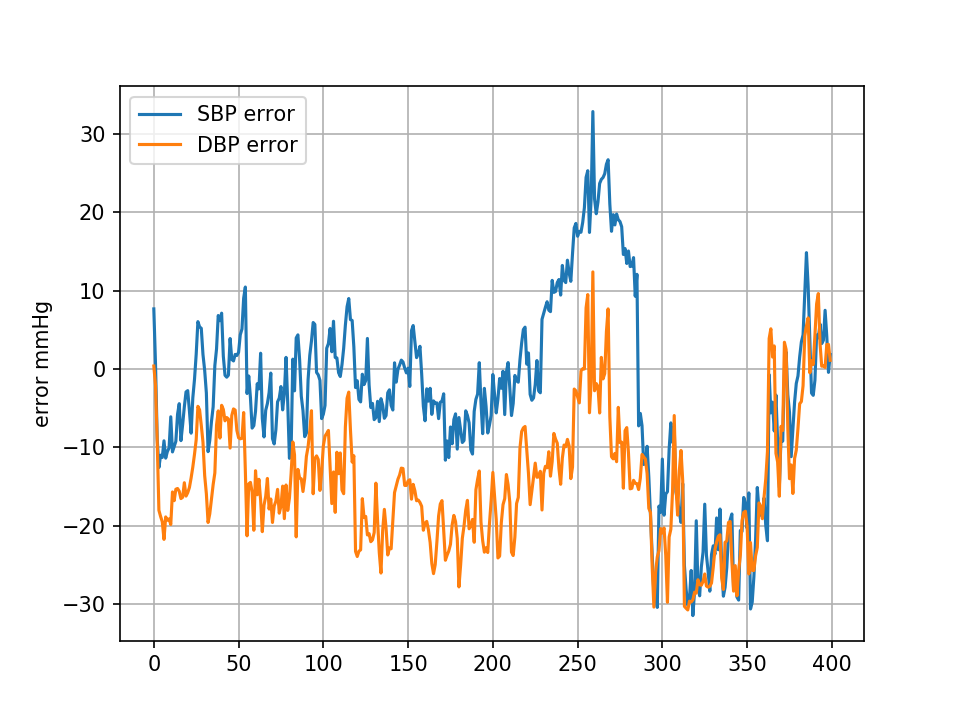

In [59]:
plt.figure()
plt.plot(result_df_jc['sbp error'], label="SBP error")
plt.plot(result_df_jc['dbp error'], label="DBP error")
plt.legend(loc="upper left")
plt.ylabel('error mmHg')
plt.grid()
plt.show()